# ARTIC Pipeline for COVID-19 (SARS-CoV-2) analysis

This is the practice to analyze COVID-19 sequence. 

I followed the instructions from Will Rowe, who developed the ARTIC tool for COVID-19, to understand the procedure. Below is the video link. 

https://www.youtube.com/watch?v=8W8dAhaPOTI&t=987s

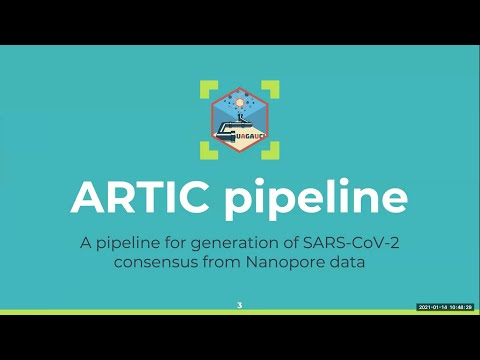

In [69]:
from IPython.display import YouTubeVideo
id='8W8dAhaPOTI'
YouTubeVideo(id=id, width="650", height="350",autoPlay="false")

## Installing the pipeline and download data

Follow the instructions to install the pipeline from conda.

https://artic.readthedocs.io/en/latest/installation/

Download the SARS-COV-2 positive control sample from the University of Birmingham. This test data is only the FASTQ reads from the positive control sample. 

http://artic.s3.climb.ac.uk/BHAM-Run88-PTC.fastq

In [9]:
!artic -v #Check the artic version

artic 1.2.1


## Start the analysis

Check the primer scheme. It is in the BED format. Below is the information from Will Rowe. There are some issues if you follow his instructions on Youtube to download the primer scheme directly. V3 primer will generate 98 amplicons.

 | column | name       | type         | description                                               |
 | :----- | :--------- | :----------- | :-------------------------------------------------------- |
 | 1      | chrom      | string       | primer reference sequence                                 |
 | 2      | chromStart | int          | starting position of the primer in the reference sequence |
 | 3      | chomEnd    | int          | ending position of the primer in the reference sequence   |
 | 4      | name       | string       | primer name                                               |
 | 5      | primerPool | int          | primer pool<sup>*</sup>                                  |
 | 6      | strand     | string (+/-) | primer direction                                          |


In [28]:
with open("nCoV-2019.primer.bed", 'r') as f:
    print(f.read())

MN908947.3	30	54	nCoV-2019_1_LEFT	1	+
MN908947.3	385	410	nCoV-2019_1_RIGHT	1	-
MN908947.3	320	342	nCoV-2019_2_LEFT	2	+
MN908947.3	704	726	nCoV-2019_2_RIGHT	2	-
MN908947.3	642	664	nCoV-2019_3_LEFT	1	+
MN908947.3	1004	1028	nCoV-2019_3_RIGHT	1	-
MN908947.3	943	965	nCoV-2019_4_LEFT	2	+
MN908947.3	1312	1337	nCoV-2019_4_RIGHT	2	-
MN908947.3	1242	1264	nCoV-2019_5_LEFT	1	+
MN908947.3	1623	1651	nCoV-2019_5_RIGHT	1	-
MN908947.3	1573	1595	nCoV-2019_6_LEFT	2	+
MN908947.3	1942	1964	nCoV-2019_6_RIGHT	2	-
MN908947.3	1875	1897	nCoV-2019_7_LEFT	1	+
MN908947.3	1868	1890	nCoV-2019_7_LEFT_alt0	1	+
MN908947.3	2247	2269	nCoV-2019_7_RIGHT	1	-
MN908947.3	2242	2264	nCoV-2019_7_RIGHT_alt5	1	-
MN908947.3	2181	2205	nCoV-2019_8_LEFT	2	+
MN908947.3	2568	2592	nCoV-2019_8_RIGHT	2	-
MN908947.3	2505	2529	nCoV-2019_9_LEFT	1	+
MN908947.3	2504	2528	nCoV-2019_9_LEFT_alt4	1	+
MN908947.3	2882	2904	nCoV-2019_9_RIGHT	1	-
MN908947.3	2880	2902	nCoV-2019_9_RIGHT_alt2	1	-
MN908947.3	2826	2850	nCoV-2019_10_LEFT	2	+
MN908947.3	3183	

Run the pipeline to get the consensus sequence. Again, you may get some issues if you used his codes directly.

In [2]:
!artic minion \
    --normalise 100 \
    --threads 2 \
    --medaka \
    --medaka-model r941_min_high_g351 \
    --strict \
    --read-file /Users/ChienTing/data/BHAM-Run88-PTC.fastq \
    --scheme-directory /Users/ChienTing/fieldbioinformatics/schemes\
    scov2/V3 \
    my_example

Running:  artic-tools validate_scheme /Users/ChienTing/fieldbioinformatics/schemes/scov2/V3/scov2.scheme.bed
[23:07:42] [artic-tools::validate_scheme] starting primer scheme validator
[23:07:42] [artic-tools::validate_scheme] reading scheme
[23:07:42] [artic-tools::validate_scheme] collecting scheme stats
[23:07:42] [artic-tools::validate_scheme] 	primer scheme file:	/Users/ChienTing/fieldbioinformatics/schemes/scov2/V3/scov2.scheme.bed
[23:07:42] [artic-tools::validate_scheme] 	reference sequence:	MN908947.3
[23:07:42] [artic-tools::validate_scheme] 	number of pools:	2
[23:07:42] [artic-tools::validate_scheme] 	number of primers:	218 (includes 22 alts)
[23:07:42] [artic-tools::validate_scheme] 	minimum primer size:	22
[23:07:42] [artic-tools::validate_scheme] 	maximum primer size:	57
[23:07:42] [artic-tools::validate_scheme] 	number of amplicons:	98
[23:07:42] [artic-tools::validate_scheme] 	mean amplicon size:	343
[23:07:42] [artic-tools::validate_scheme] 	maximum amplicon size:	375


[23:08:57 - Feature] Processed MN908947.3:13307.0-13698.0 (median depth 197.0)
[23:08:57 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 13918-14298.
[23:08:57 - Feature] Processed MN908947.3:13918.0-14298.0 (median depth 200.0)
[23:08:57 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 14545-14925.
[23:08:57 - Feature] Processed MN908947.3:14545.0-14925.0 (median depth 200.0)
[23:08:57 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 15171-15559.
[23:08:57 - Feature] Processed MN908947.3:15171.0-15559.0 (median depth 200.0)
[23:08:57 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 15827-16208.
[23:08:57 - Feature] Processed MN908947.3:15827.0-16208.0 (median depth 200.0)
[23:08:57 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 16416-16832.
[23:08:57 - Feature]

[23:09:02 - Feature] Processed MN908947.3:8595.0-8982.0 (median depth 200.0)
[23:09:02 - Sampler] Took 0.06s to make features.
[23:09:02 - Sampler] Initializing sampler for consensus of region MN908947.3:12110-12490.
[23:09:02 - Feature] Processed MN908947.3:10999.0-11393.0 (median depth 200.0)
[23:09:02 - Sampler] Took 0.10s to make features.
[23:09:02 - Sampler] Initializing sampler for consensus of region MN908947.3:12710-13096.
[23:09:02 - Feature] Processed MN908947.3:12110.0-12489.0 (median depth 200.0)
[23:09:02 - Sampler] Took 0.09s to make features.
[23:09:02 - Sampler] Initializing sampler for consensus of region MN908947.3:13918-14299.
[23:09:02 - Feature] Processed MN908947.3:12710.0-13095.0 (median depth 200.0)
[23:09:02 - Sampler] Took 0.10s to make features.
[23:09:02 - Sampler] Initializing sampler for consensus of region MN908947.3:17674-18062.
[23:09:02 - Feature] Processed MN908947.3:13918.0-14298.0 (median depth 200.0)
[23:09:02 - Sampler] Took 0.08s to make feature

[23:09:36 - TrimOlap] MN908947.3:24419.1-24788.2 and MN908947.3:24978.0-25356.0 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:24986.3-25368.0 and MN908947.3:25601.0-25948.9 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:25632.1-25993.0 and MN908947.3:26197.0-26516.0 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:26274.3-26589.0 and MN908947.3:26835.0-27188.2 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:26863.1-27226.0 and MN908947.3:27446.0-27853.0 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:27446.0-27853.0 and MN908947.3:28081.0-28445.1 cannot be concatenated as there is no overlap and they do not abut.
[23:09:36 - TrimOlap] MN908947.3:28102.0-28463.0 and MN908947.3:28677.0-29035.1 cannot be concatenated as there 

[23:09:43 - Feature] Processed MN908947.3:19844.0-20254.0 (median depth 200.0)
[23:09:43 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 20472-20889.
[23:09:43 - Feature] Processed MN908947.3:20472.0-20889.0 (median depth 200.0)
[23:09:43 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 21075-21454.
[23:09:43 - Feature] Processed MN908947.3:21075.0-21454.0 (median depth 200.0)
[23:09:43 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 21658-22037.
[23:09:43 - Feature] Processed MN908947.3:21658.0-22037.0 (median depth 200.0)
[23:09:43 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 22262-22649.
[23:09:43 - Feature] Processed MN908947.3:22262.0-22649.0 (median depth 34.0)
[23:09:43 - Feature] Pileup counts do not span requested region, requested MN908947.3:0-29903, received 22797-23213.
[23:09:43 - Feature] 

[23:10:07 - TrimOlap] MN908947.3:6479.1-6872.0 and MN908947.3:7035.0-7414.0 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:7035.0-7414.0 and MN908947.3:7626.0-8018.0 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:7626.0-8018.0 and MN908947.3:8249.0-8622.0 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:8291.0-8660.0 and MN908947.3:8888.0-9263.2 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:8893.3-9270.0 and MN908947.3:9477.0-9794.0 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:9540.1-9857.0 and MN908947.3:10076.0-10449.2 cannot be concatenated as there is no overlap and they do not abut.
[23:10:07 - TrimOlap] MN908947.3:10083.0-10458.0 and MN908947.3:10666.0-11056.2 cannot be concatenated as there is no overlap and they

2024-01-24 23:10:10    10% of variants processed...
2024-01-24 23:10:10    20% of variants processed...
2024-01-24 23:10:10    30% of variants processed...
2024-01-24 23:10:10    40% of variants processed...
2024-01-24 23:10:10    50% of variants processed...
2024-01-24 23:10:10    60% of variants processed...
2024-01-24 23:10:10    70% of variants processed...
2024-01-24 23:10:10    80% of variants processed...
2024-01-24 23:10:10    100% of variants processed.
2024-01-24 23:10:10 Calling initial genotypes using pair-HMM realignment...
Running: artic_vcf_filter --medaka my_example.merged.vcf my_example.pass.vcf my_example.fail.vcf
Running: bgzip -f my_example.pass.vcf
Running: tabix -p vcf my_example.pass.vcf.gz
Running: artic_make_depth_mask --store-rg-depths /Users/ChienTing/fieldbioinformatics/schemes/scov2/V3/scov2.reference.fasta my_example.primertrimmed.rg.sorted.bam my_example.coverage_mask.txt
Running: artic_mask /Users/ChienTing/fieldbioinformatics/schemes/scov2/V3/scov2.refe

## QC 

This can help to understand the reads for each amplicon. Based on their definition, if the total number of reads assigned to an amplicon is below 50 (red dashed line), the amplicon is marked as dropped out.

In [47]:
with open('my_example.amplicon_plot_data_mqc.json') as user_file:
    file_contents = user_file.read()
    print(file_contents)

{
    "id": "custom_data_lineplot",
    "section_name": "ARTIC: Amplicon Coverage",
    "description": "This plot summarises the number of reads that were assigned to each amplicon in the primer scheme.\nWe use the align_trim report file from the ARTIC pipeline and group each read by its assigned amplicon.\nIf the length of alignment between read and reference is <0.95% of the amplicon length, the read discarded from the coverage plot.\nIf the total number of reads assigned to an amplicon is below 50 (red dashed line),\nthe amplicon is marked as dropped out.",
    "plot_type": "linegraph",
    "pconfig": {
        "id": "custom_data_linegraph",
        "title": "",
        "categories": "True",
        "yDecimals": "False",
        "xDecimals": "False",
        "ylab": "# reads",
        "xlab": "amplicon",
        "yPlotLines": [
            {
                "color": "#FF0000",
                "width": 2,
                "dashStyle": "LongDash",
                "label": "Amplicon dro

In [48]:
import pandas as pd
data = pd.read_json('my_example.amplicon_plot_data_mqc.json')
lists = data['data']['my_example'].items()
x,y = zip(*lists)

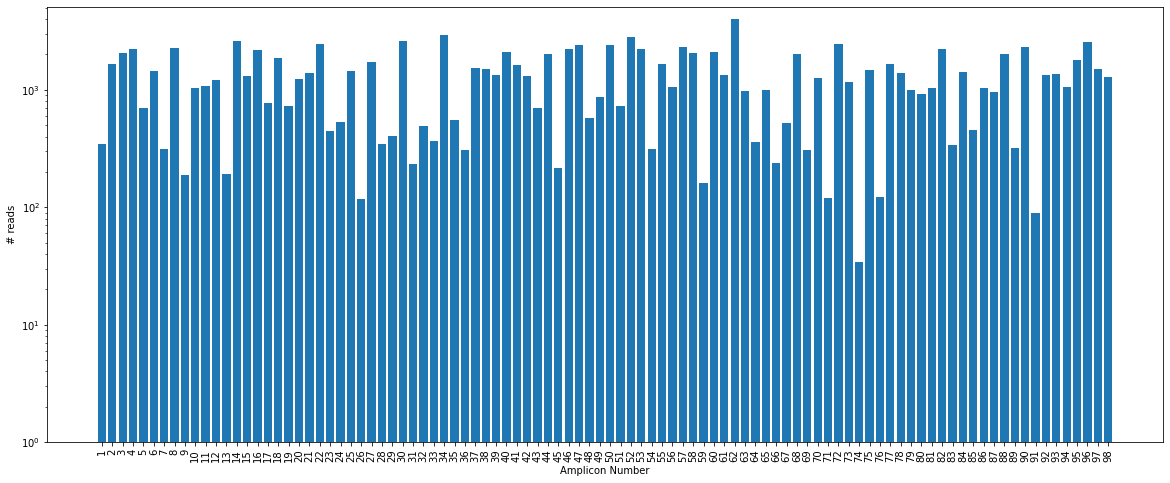

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(x, height=y)
plt.xticks(rotation=90)
plt.xlabel('Amplicon Number')
plt.ylabel('# reads')
plt.yscale('log')
plt.ylim(1,)
plt.show()

Below is the graph from ARTIC Network. They showed the performance of V3 primer vs V2 vs V1. 

"This dramatically improves the performance of these weaker regions and requires only 100,000 reads per sample to achieve 50x minimum coverage across all regions."  - ARTIC nCoV-2019 Version 3 Amplicon Release

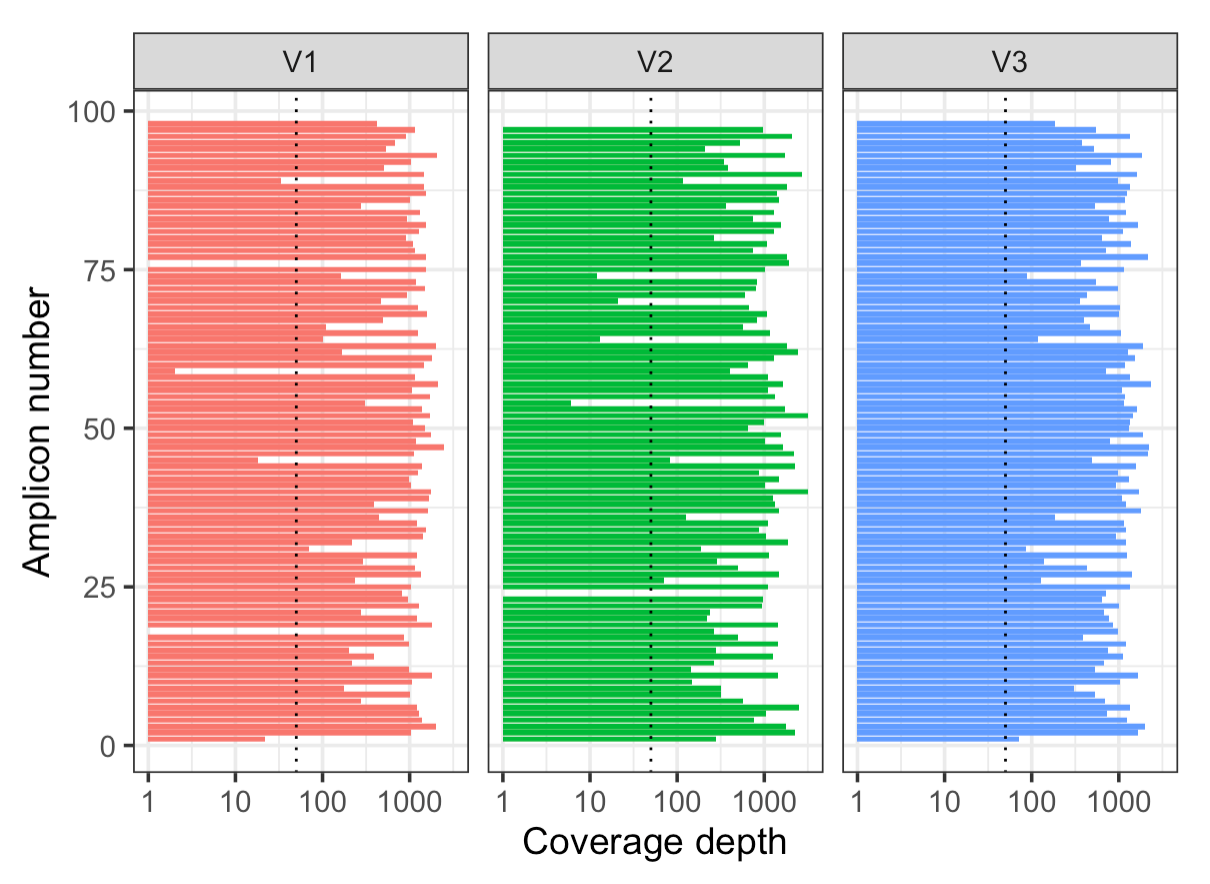

In [60]:
from IPython.display import Image
Image ('/Users/ChienTing/Downloads/artic v3.png',width=1000)

## Pipeline Output

After the pipeline, I get a lot of files. Below is the information from Will Rowe. This describes the function for some of the files.

|filename|description|
|:-------|:----------|
|`my_example.trimmed.rg.sorted.bam`| the post-processed alignment of reads to the reference genome. |
|`my_example.primertrimmed.rg.sorted.bam` | the post-processed alignment with additional softmasking to exclude primer sequences. |
|`my_example.vcfreport.txt` | a report evaluating reported variants against the primer scheme. |
|`my_example.pass.vcf.gz`    | detected variants that passed filters. |
|`my_example.consensus.fasta`  | the consensus sequence for the input sample. |
|`my_example..muscle.out.fasta` | an alignment of the consensus sequence against the reference sequence. |

The consensus sequence from this control sample is 29903 bp, same as the original virus (Wuhan-Hu-1).(https://www.ncbi.nlm.nih.gov/nuccore/MN908947)

In [29]:
from Bio import AlignIO
alignment = AlignIO.read("my_example.muscle.out.fasta", "fasta")
print("alignment length= {}\n" .format(alignment.get_alignment_length()))
for record in alignment:
    print("{}\n{}".format(record.id, record.seq))

alignment length= 29903

my_example/ARTIC/medaka
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATA

However, there are some variants. Below is the summary.

In [59]:
import vcf
vcf_reader = vcf.Reader(filename="my_example.pass.vcf.gz")

print("chromosome\tpos\tref\talt")
for record in vcf_reader:
    print("{}\t{}\t{}\t{}" .format(record.CHROM, record.POS, record.REF, record.ALT))

chromosome	pos	ref	alt
MN908947.3	2618	A	[G]
MN908947.3	8782	C	[T]
MN908947.3	18488	T	[C]
MN908947.3	21846	C	[T]
MN908947.3	23605	T	[G]
MN908947.3	26354	T	[A]
MN908947.3	28144	T	[C]
MN908947.3	29366	C	[T]
MN908947.3	29596	A	[G]


## DNA -> Protein

Translate DNA sequence into protein sequence to compare the difference. 

In [163]:
from Bio import AlignIO
alignment = AlignIO.read("my_example.muscle.out.fasta", "fasta")

for entry in alignment:
    print(entry.id)

my_example/ARTIC/medaka
MN908947.3


In [164]:
seqs={}
protein={}
for entry in alignment:
    seqs[entry.id]=entry
    protein[entry.id]=Bio.Seq.translate(seqs[entry.id].seq)

/Users/ChienTing/anaconda3/envs/artic-ncov2019/lib/python3.6/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [165]:
protein['my_example/ARTIC/medaka']

Seq('XXXXXXXXXXXXXXXXXXRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...XXX')

In [166]:
protein['MN908947.3']

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

Our DNA and protein sequence results show that some regions were not sequenced in our sample. Therefore, I decide not to compare that region.

In [168]:
aa_diff=[]
for aa in range(len(protein['MN908947.3'])):
    if (protein['MN908947.3'][aa] != protein['my_example/ARTIC/medaka'][aa]) & (protein['my_example/ARTIC/medaka'][aa]!='X'):
        aa_diff.append([aa,protein['MN908947.3'][aa]])


In [169]:
aa_diff

[[872, 'Y'],
 [2927, 'P'],
 [6162, 'I'],
 [7868, 'S'],
 [8784, 'L'],
 [9381, 'Y'],
 [9788, 'T'],
 [9865, 'I']]

Based on the previous DNA variant results, some DNA variants alter the amino acid sequence in this sample. 